# Abelian sandpile model

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
#+--------+
#|********|
#|********|
#+--------+

In [2]:
def plotheatmap(u, t):
    fig, ax = plt.subplots()
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.title(f"Criticality = 3 | four edges")
    plt.xlabel("x")
    plt.ylabel("y")
  # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u[t,:,:], cmap=plt.cm.Greens, vmin=0, vmax=3)
    plt.colorbar(label='Number of grains')
    plt.savefig("sandpile"+str(t), dpi=100, bbox_inches='tight')
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

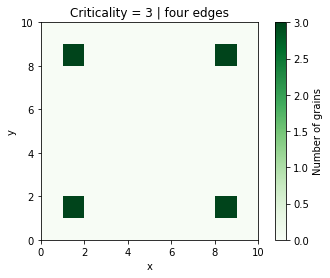

In [3]:
plate_length = 10
max_iter_time = 10000

# the structure of the solution u
u = np.empty((max_iter_time, plate_length, plate_length))

# initialize the condition 
u_initial = 0
# Set the initial condition
u.fill(u_initial)

# Boundary conditions for four sides 
u_top = 0
u_left = 0
u_bottom = 0
u_right = 0

# Set the boundary conditions for inner grid not including the plate side 
u[:, 0, 0:(plate_length)] = u_bottom 
u[:, 0:(plate_length), 0] = u_left
u[:, 0:(plate_length),(plate_length-1)] = u_right 
u[:, (plate_length-1), 0:(plate_length)] = u_top

# set 4 edges
u[0,1,plate_length-2] = 1000000
u[0,plate_length-2,1] = 1000000
u[0,1,1] = 1000000
u[0,plate_length-2,plate_length-2] = 1000000

stability_threshold = 3

plotheatmap(u, 0)
# np.arctan(2)*180/np.pi

In [4]:
# calculate u
def calculate(u):
    # check all the possible vertices
    for t in range(0,max_iter_time-1,1):
        u[t+1,:,:]   = u[t,:,:]  # copy u at time t to u at t+1
        u[t+1,1,plate_length-2]  = u[t,1,plate_length-2] + 10
        u[t+1,plate_length-2,1]  = u[t,plate_length-2,1] + 10
        u[t+1,1,1]               = u[t,1,1] + 10
        u[t+1,plate_length-2,plate_length-2] = u[t,plate_length-2,plate_length-2] + 10
        for i in range(1, plate_length-1):
            for j in range(1, plate_length-1):
                if u[t,i,j] >= stability_threshold:
                     # avalanche!
                    u[t+1,i+1,j] = u[t,i+1,j] + 1
                    u[t+1,i-1,j] = u[t,i-1,j] + 1
                    u[t+1,i,j+1] = u[t,i,j+1] + 1
                    u[t+1,i,j-1] = u[t,i,j-1] + 1
        # diagnostic eliminate unstable point         
        for i in range(1, plate_length-1):
            for j in range(1, plate_length-1):
                if u[t,i,j] >= stability_threshold:
                    u[t+1,i,j] = u[t,i,j] - 4
        # clear plate boundary
        u[t+1, 0, 0:(plate_length)] = 0
        u[t+1, 0:(plate_length), 0] = 0
        u[t+1, 0:(plate_length),(plate_length-1)] = 0
        u[t+1, (plate_length-1), 0:(plate_length)] = 0
    return u
u = calculate(u)

0
2000
4000
6000
8000


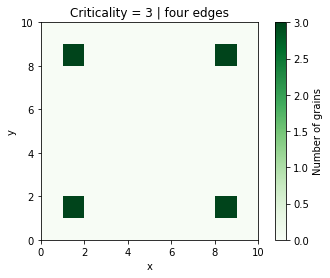

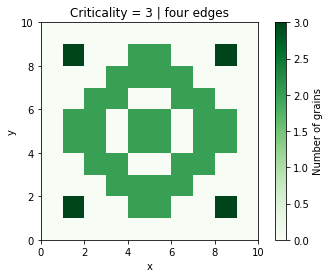

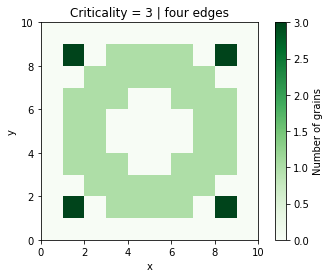

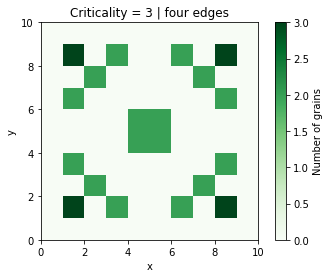

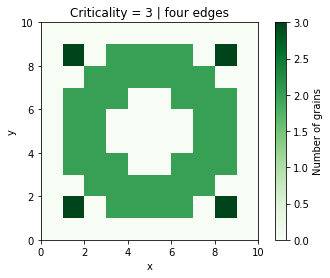

In [5]:
for t in range(0,10000,2000):
    plotheatmap(u, t)
    print(t)

In [6]:
# heating at one side of the piramid
# for i in range(1,8):
#     u[t+1,i,i:plate_length-i] = u[t,i,i:plate_length-i]+1

# piramid model
# for i in range(1,plate_length):
#     u[0, i, i:(plate_length-i)] = i
#     u[0, i:(plate_length-i), i] = i
#     u[0, i:(plate_length-i),(plate_length-i-1)] = i
#     u[0, (plate_length-i-1), i:(plate_length-i)] = i